In [1]:
import os
import random
import imageio
import matplotlib.pyplot as plt

from imgaug import augmenters as iaa
from imgaug import parameters as iap

from utils.helpers import resize_to_256

In [2]:
gi_images_path = './data/images'

In [3]:
aug = iaa.Sequential([
    iaa.Add(
        iap.Normal(0, 50),
        per_channel=0.3
    ),
    iaa.ContrastNormalization(
        iap.Normal(1, 0.1),
        per_channel=0.3
    ),
    iaa.Affine(
        scale=iap.Normal(1, 0.1),
        rotate=iap.Normal(0, 20),
        shear=iap.Normal(0, 5),
        mode='wrap'
    )
])

def get_bg_from_gi_generator(path: str):
    path_list = [
        os.path.join(gi_images_path, filename)
        for filename in os.listdir(gi_images_path)
    ]
    while True:
        img_path = random.choice(path_list)
        arr = imageio.imread(img_path, pilmode='RGB')
        arr = resize_to_256(arr)
        yield aug.augment_image(arr)

In [4]:
generator = get_bg_from_gi_generator(gi_images_path)
    

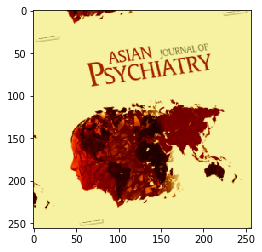

In [5]:
img = generator.__next__()
plt.imshow(img);